In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
from LDA2Vec import LDA2Vec

In [33]:
df = pd.read_csv('../data/processed_reviews.csv')

In [34]:
df.isna().sum()

brand            679
product_title      0
proxy_date         0
retailer           0
category           0
subcategory        0
review_text        0
star_rating        0
topic              0
brand_type         0
dtype: int64

In [35]:
lda2vec_model = LDA2Vec(df)

In [36]:
subcat_sizes = df['subcategory'].value_counts().to_dict()
subcat_sizes

{'FACE CARE FACIAL MOISTURIZERS': 81938,
 'FACE CARE FACIAL CLEANSERS': 80514,
 'FACE CARE ACNE TREATMENTS': 46202,
 'FACE CARE FACIAL TOWELETTES': 43130,
 'FACE CARE FACIAL TREATMENTS': 37345,
 'BODY CARE BODY WASH': 28433,
 'WIPES DISINFECTING WIPES': 22595,
 'ODOR CONTROLLING DISINFECTING SPRAYS': 20806,
 'BODY CARE BODY LOTION': 20281,
 'LIP CARE LIP BALM': 19107,
 'FLOOR CLEANERS CONVENIENCE': 17318,
 'SPRAY CLEANERS ALL PURPOSE CLEANERS': 16896,
 'BODY CARE': 14068,
 'DRAIN CARE': 12212,
 'AIR FRESHENER': 11161,
 'DILUTABLES SCENTED/NON-DISINFECTING DILUTABLES': 10754,
 'ODOR CONTROLLING AIR FRESHENERS': 9877,
 'CONSUMABLE TOOLS CONSUMABLE SCRUBBERS': 8992,
 'FACE CARE': 8873,
 'TOILET BOWL CLEANERS MANUAL TB CLEANERS': 7972,
 'SPRAY CLEANERS GLASS + SURFACE CLEANERS': 7312,
 'FACE CARE FACE MASKS': 7067,
 'LIP CARE LIP TREATMENT': 6749,
 'BATHROOM CLEANERS GENERAL BATHROOM CLEANERS': 6271,
 'BODY CARE BAR SOAP': 5595,
 'FLOOR CLEANERS CARPET': 5352,
 'SPRAY CLEANERS BLEACH CLEAN

In [37]:
# target_sizes = [20000, 10000, 5000, 2000]
# num_subcats = [1, 2, 5, 10]
# subcategories = []
# for target_size in target_sizes:
#     valid_subcats = [name for name, size in subcat_sizes.items() if abs(size - target_size) < 1000]
#     subcategories.extend(valid_subcats[:num_subcats[target_sizes.index(target_size)]])
subcategories = ["WIPES DISINFECTING WIPES", "BODY CARE BODY LOTION", "AIR FRESHENER", "SPRAY CLEANERS BLEACH CLEANERS", "HAIR CARE"]

In [38]:
# subcategories = ['SPRAY CLEANERS BLEACH CLEANERS', 'WOOD/FURNITURE/DUST', 'BODY CARE BODY LOTION']
result_df = lda2vec_model.train_model(subcategories)

Creating LDA2Vec Model with 3 topics for 933 reviews (star rating 1.0) in subcategory WIPES DISINFECTING WIPES
Finished creating LDA2Vec model for 1.0 star rating in 15.41 seconds

--------------------------------------------------
Creating LDA2Vec Model with 3 topics for 321 reviews (star rating 2.0) in subcategory WIPES DISINFECTING WIPES
Finished creating LDA2Vec model for 2.0 star rating in 5.32 seconds

--------------------------------------------------
Creating LDA2Vec Model with 3 topics for 591 reviews (star rating 3.0) in subcategory WIPES DISINFECTING WIPES
Finished creating LDA2Vec model for 3.0 star rating in 9.13 seconds

--------------------------------------------------
Creating LDA2Vec Model with 2 topics for 1907 reviews (star rating 4.0) in subcategory WIPES DISINFECTING WIPES
Finished creating LDA2Vec model for 4.0 star rating in 28.43 seconds

--------------------------------------------------
Creating LDA2Vec Model with 2 topics for 18843 reviews (star rating 5.0) 

In [39]:
result_df.shape

(640606, 15)

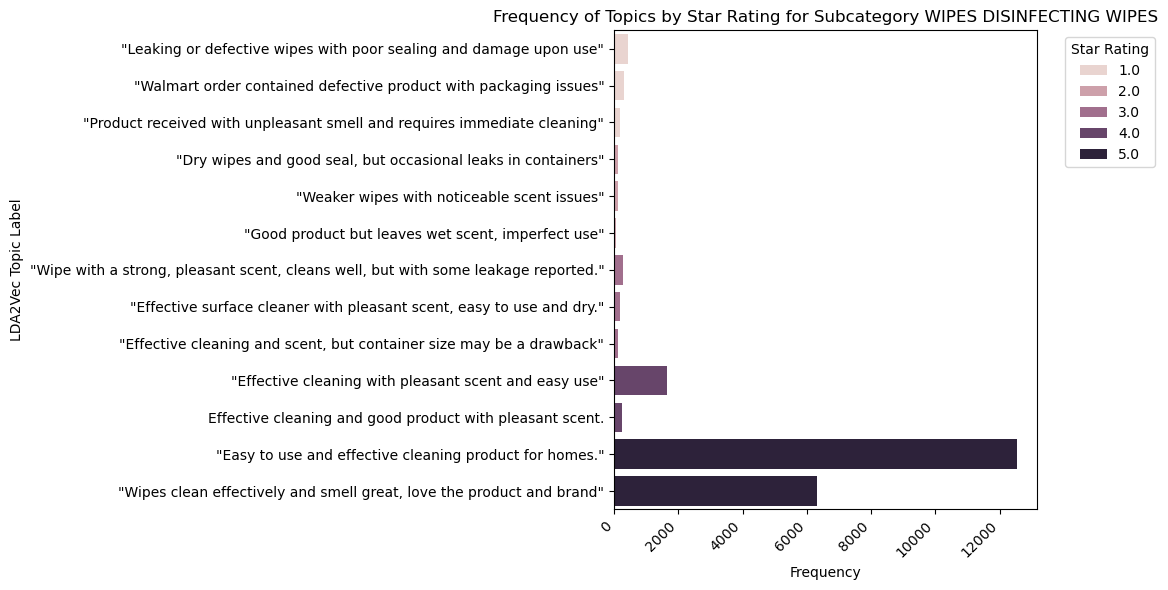

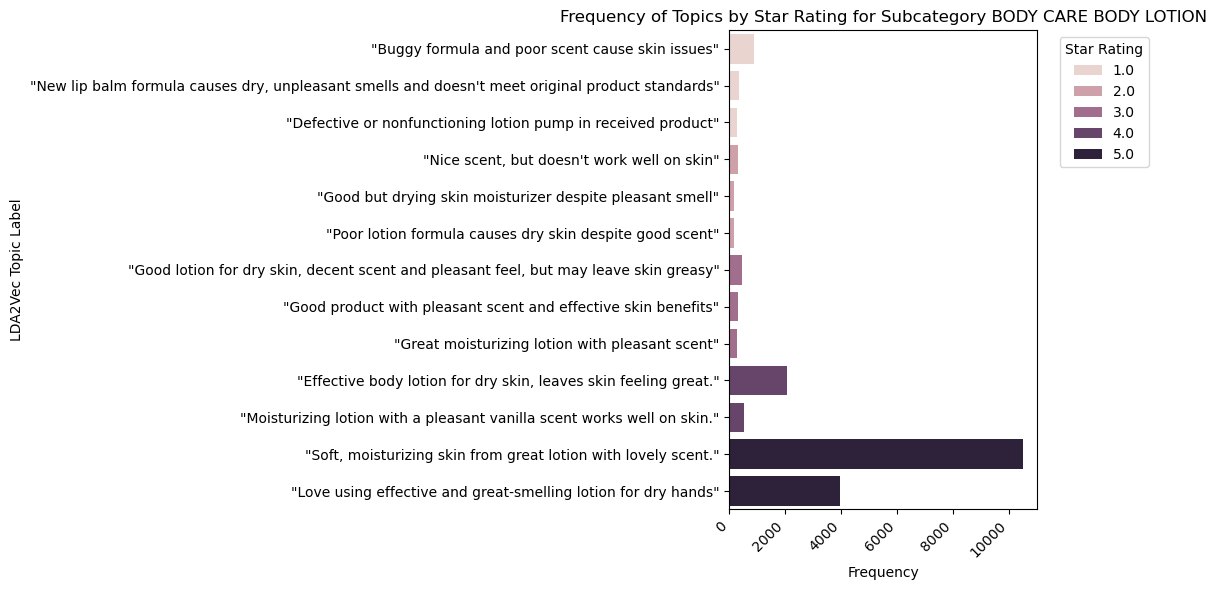

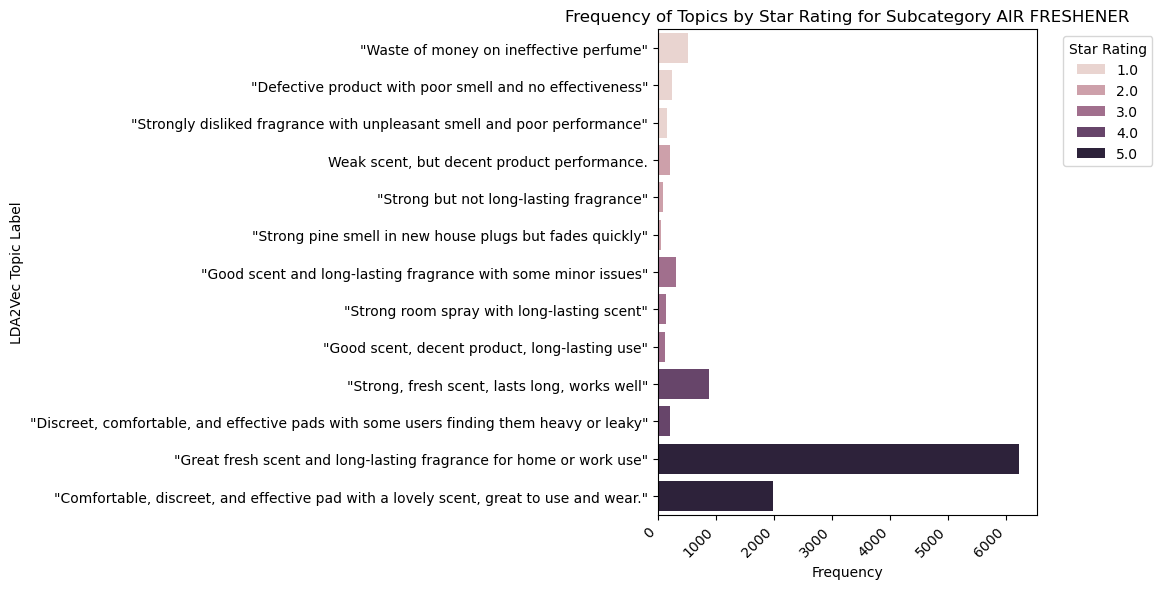

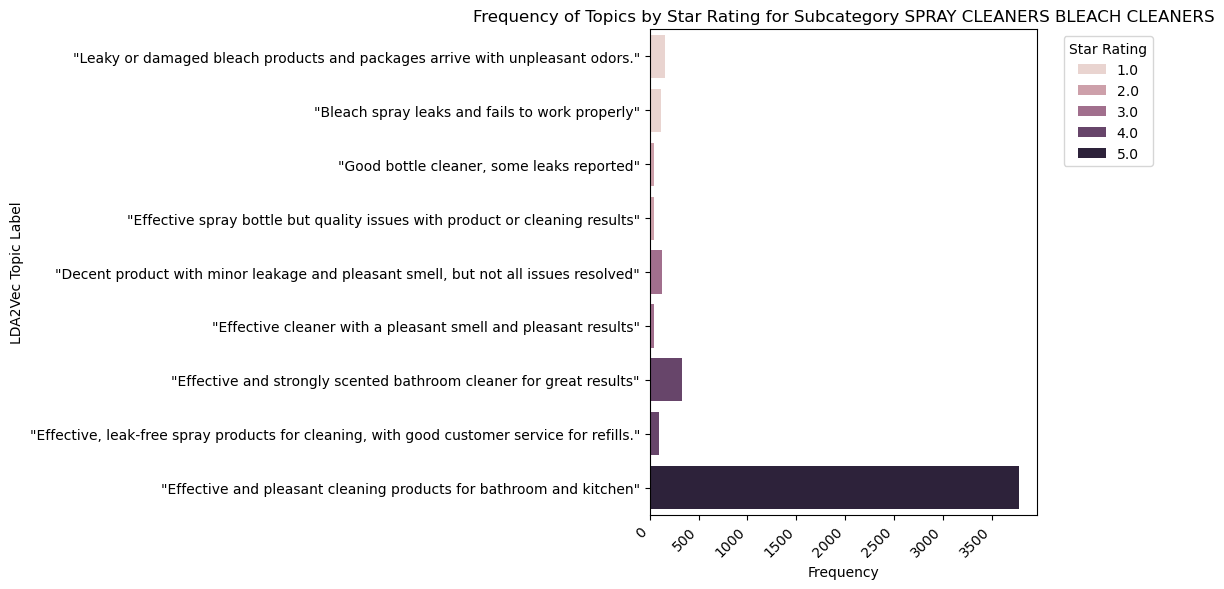

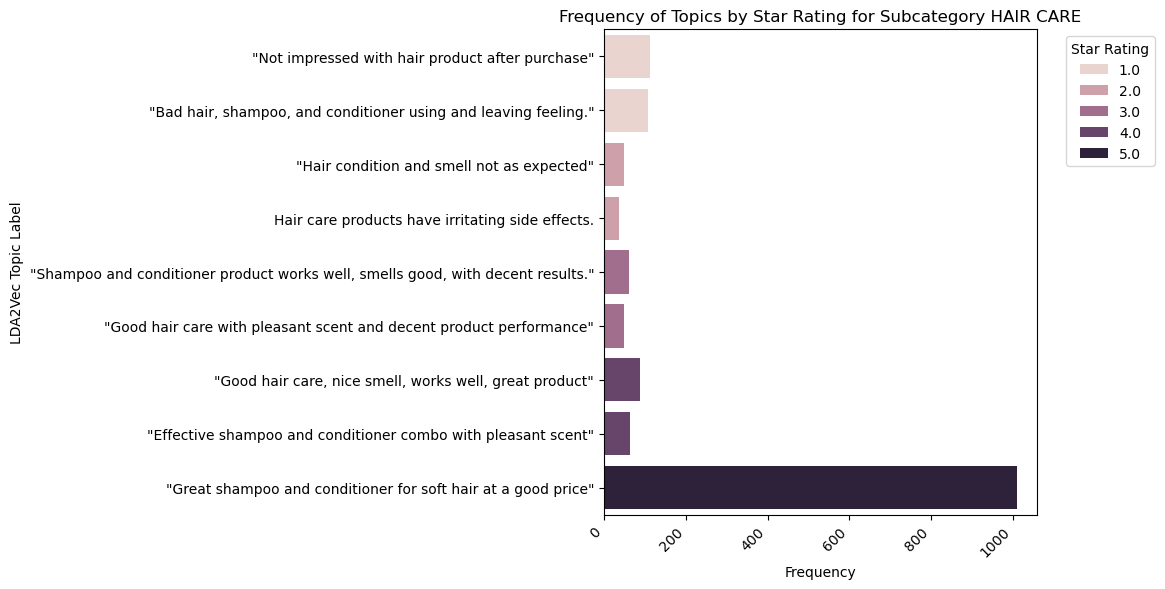

In [40]:
for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory']==subcategory]
    df_subcategory_grouped_df = df_subcategory.groupby('star_rating')['lda2vec_topic_label'].value_counts().reset_index(name='count')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_subcategory_grouped_df, x='count', y='lda2vec_topic_label', hue='star_rating', dodge=False)

    # Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of Topics by Star Rating for Subcategory {subcategory}')
    plt.xlabel('Frequency')
    plt.ylabel('LDA2Vec Topic Label')
    plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()

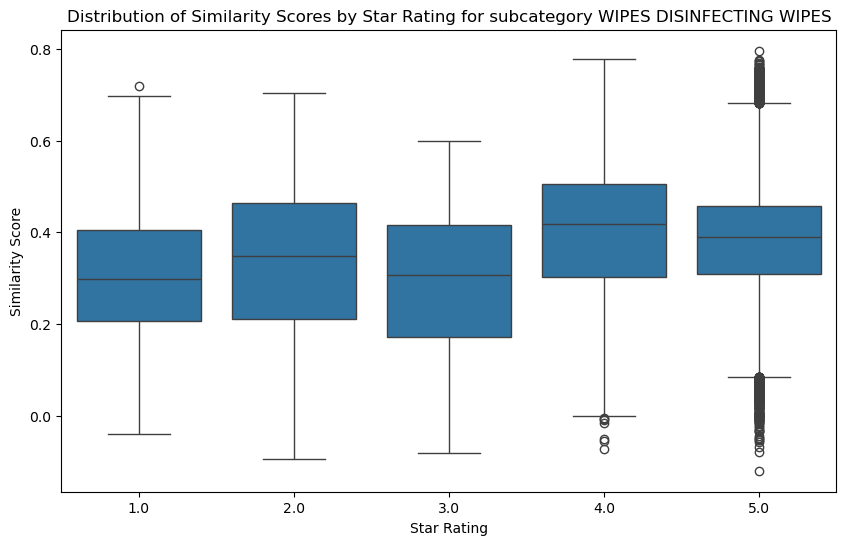

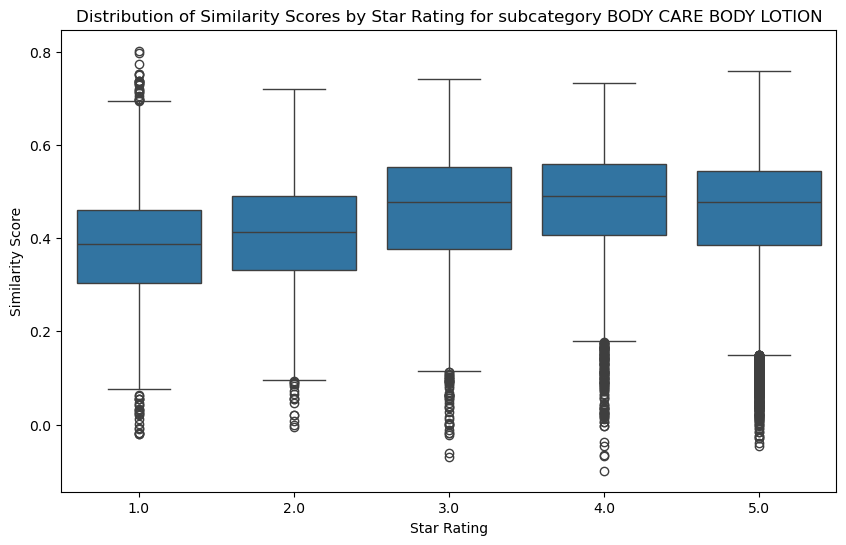

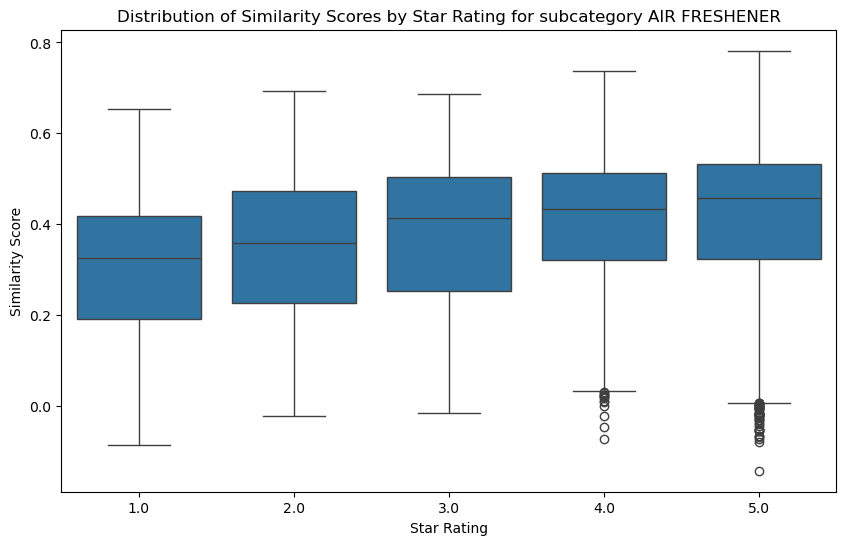

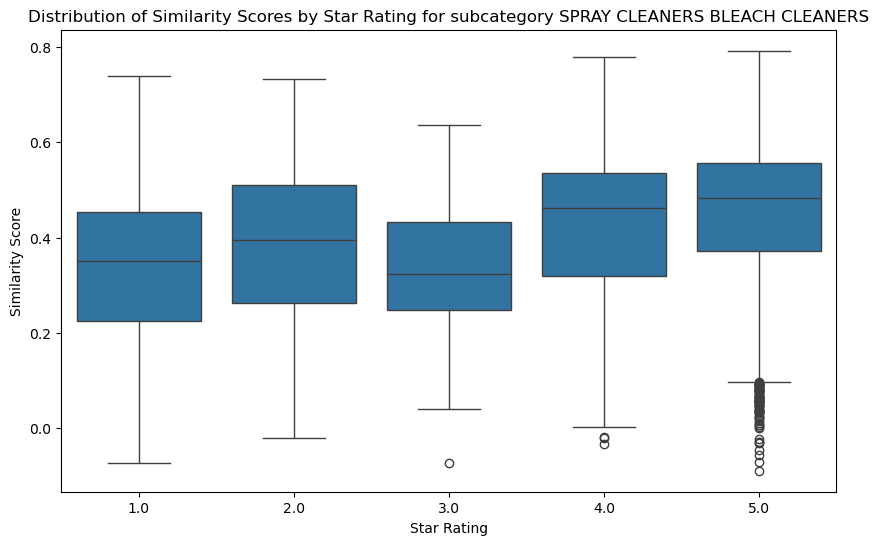

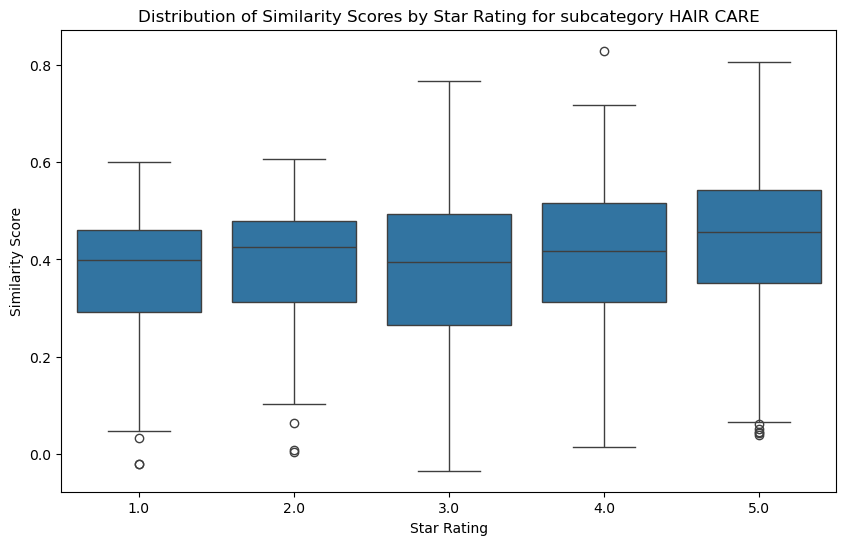

In [41]:
for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory']==subcategory]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_subcategory, x='star_rating', y='lda2vec_similarity_score')
    plt.title(f'Distribution of Similarity Scores by Star Rating for subcategory {subcategory}')
    plt.xlabel('Star Rating')
    plt.ylabel('Similarity Score')
    plt.show()

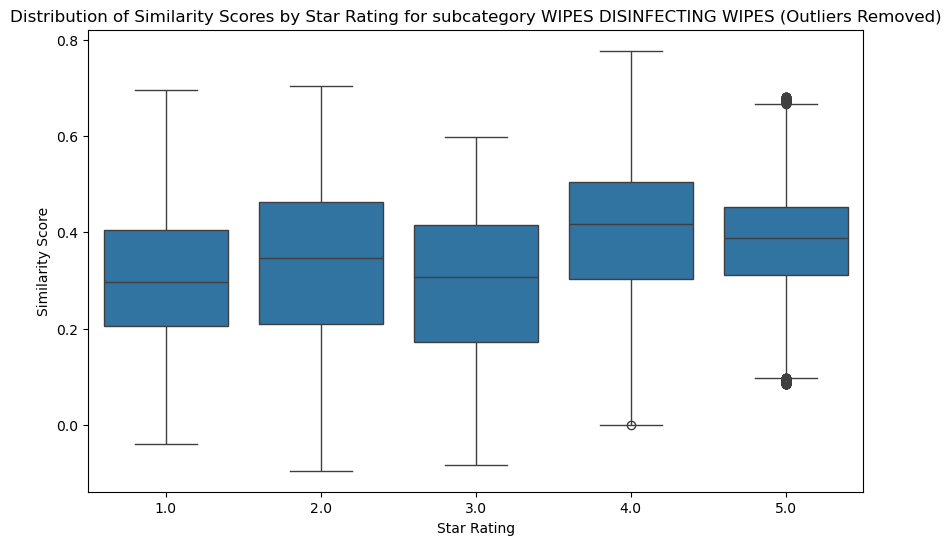

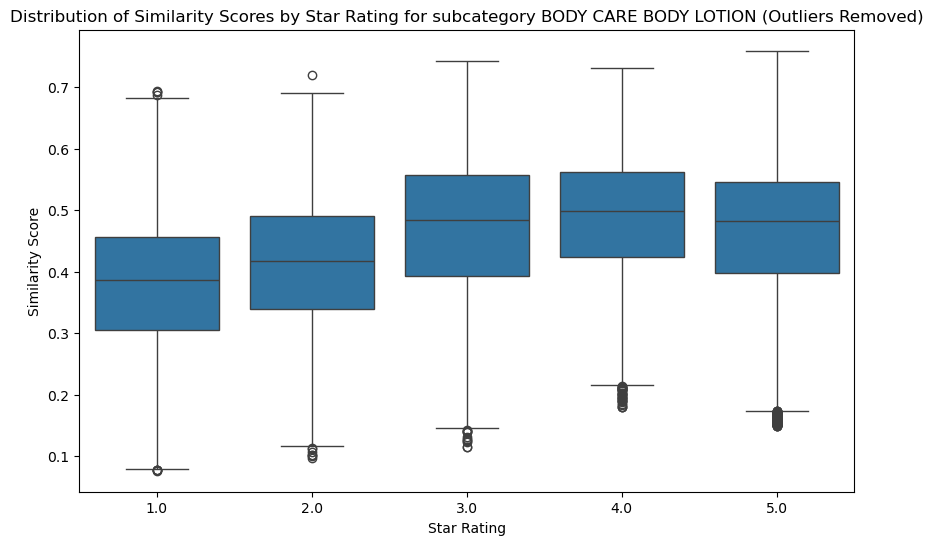

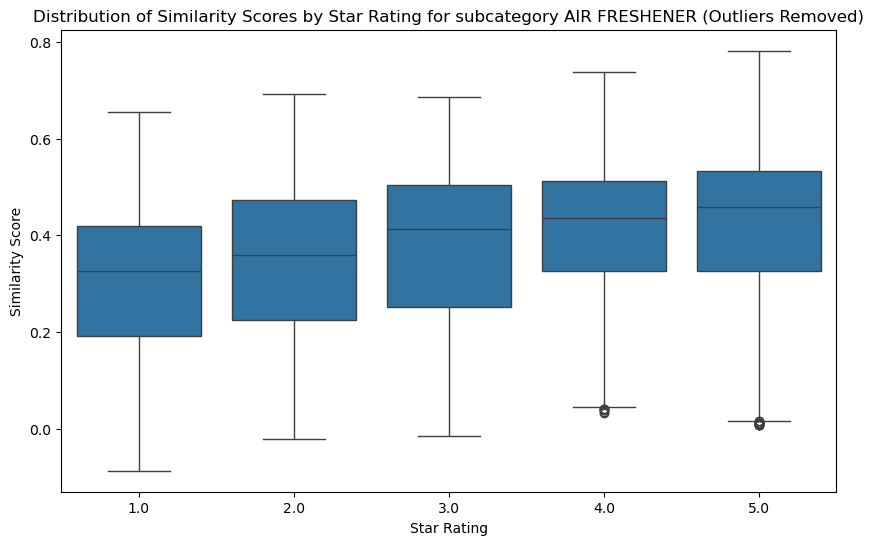

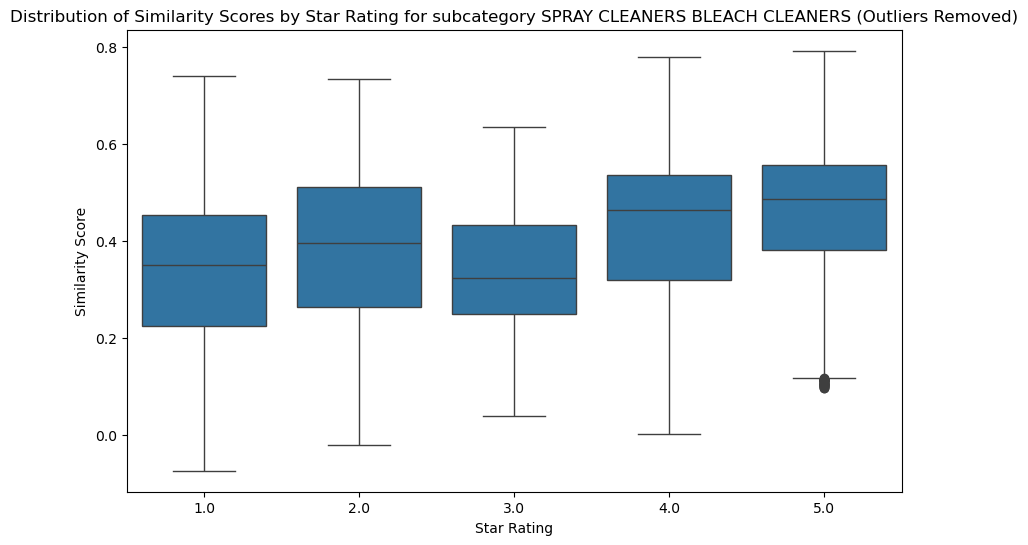

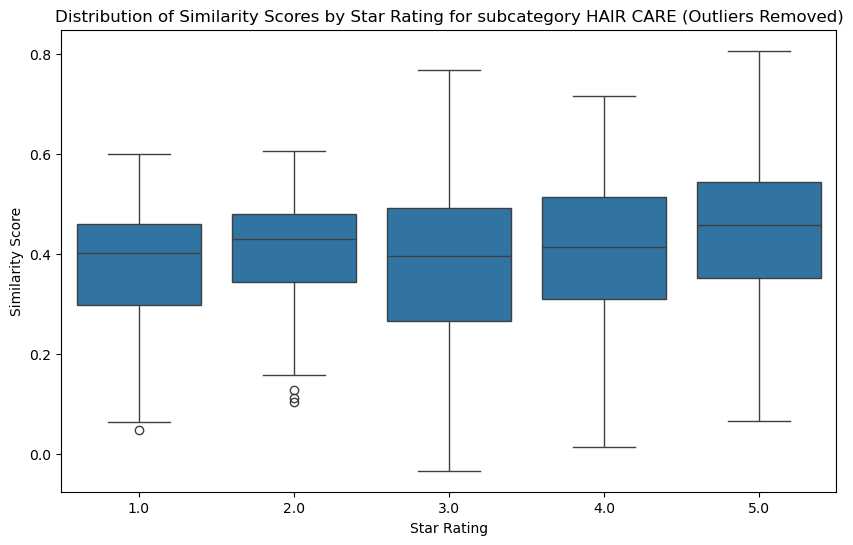

In [42]:
# similarity scores without outliers
filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data

for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory'] == subcategory]
    
    for star_rating in df_subcategory['star_rating'].unique():
        df_rating = df_subcategory[df_subcategory['star_rating'] == star_rating]
        
        # Calculate Q1, Q3, and IQR for similarity_score
        Q1 = df_rating['lda2vec_similarity_score'].quantile(0.25)
        Q3 = df_rating['lda2vec_similarity_score'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df_filtered = df_rating[(df_rating['lda2vec_similarity_score'] >= lower_bound) & (df_rating['lda2vec_similarity_score'] <= upper_bound)]
        
        # Append filtered data to the new DataFrame
        filtered_df = pd.concat([filtered_df, df_filtered])

# Plot boxplot without outliers
for subcategory in subcategories:
    df_subcategory = filtered_df[filtered_df['subcategory'] == subcategory]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_subcategory, x='star_rating', y='lda2vec_similarity_score')
    plt.title(f'Distribution of Similarity Scores by Star Rating for subcategory {subcategory} (Outliers Removed)')
    plt.xlabel('Star Rating')
    plt.ylabel('Similarity Score')
    plt.show()


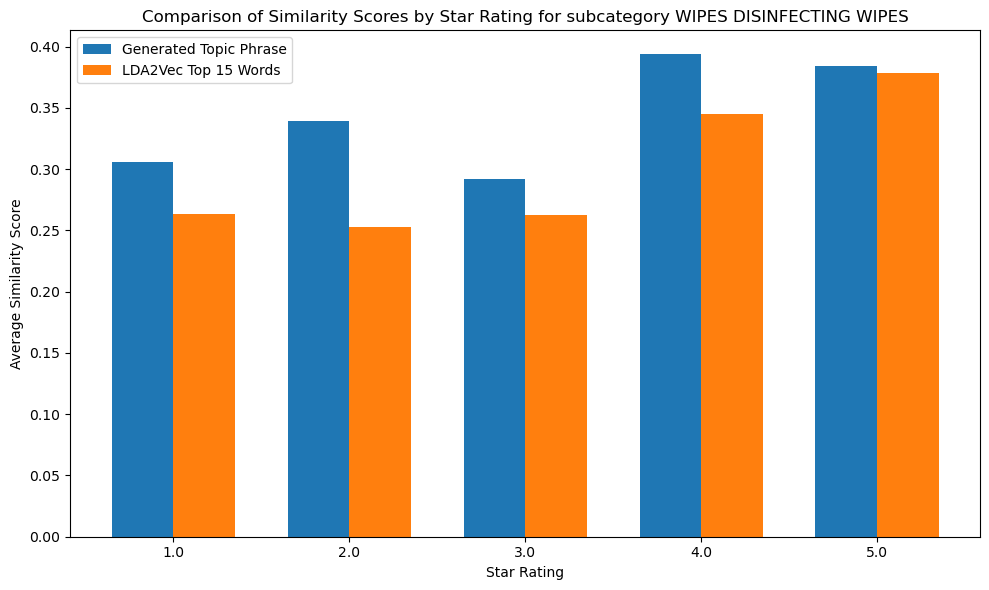

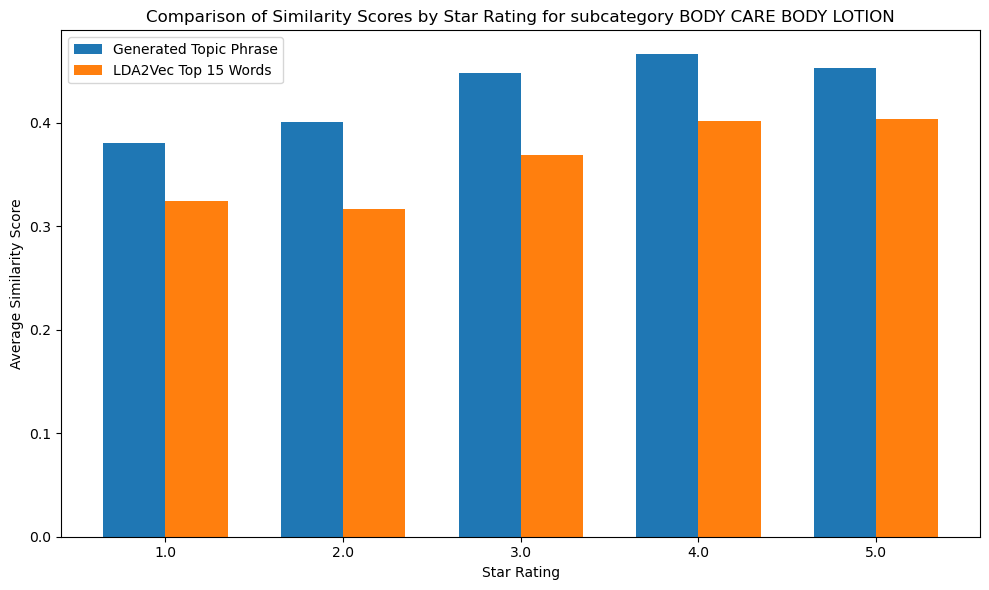

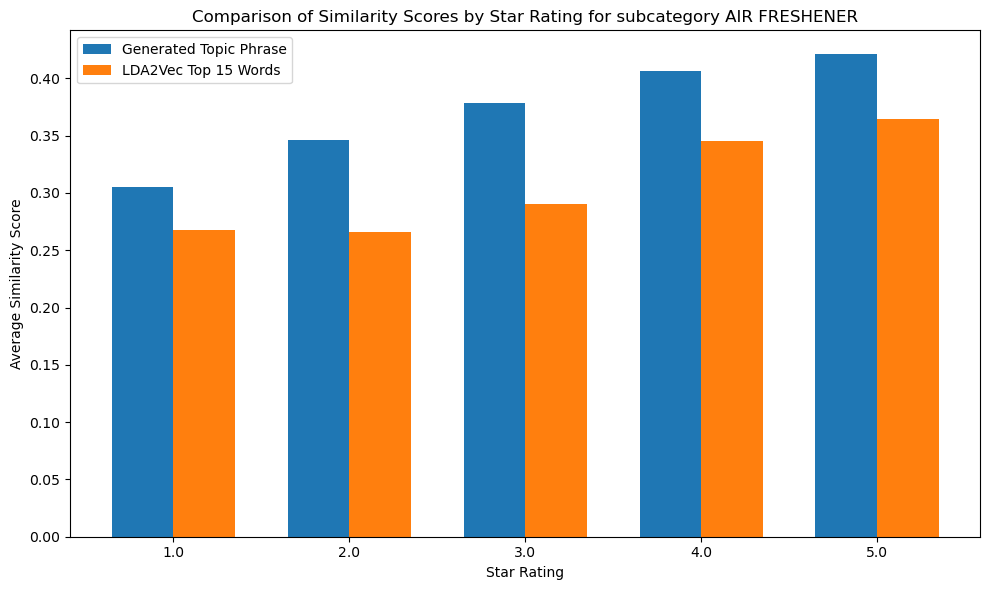

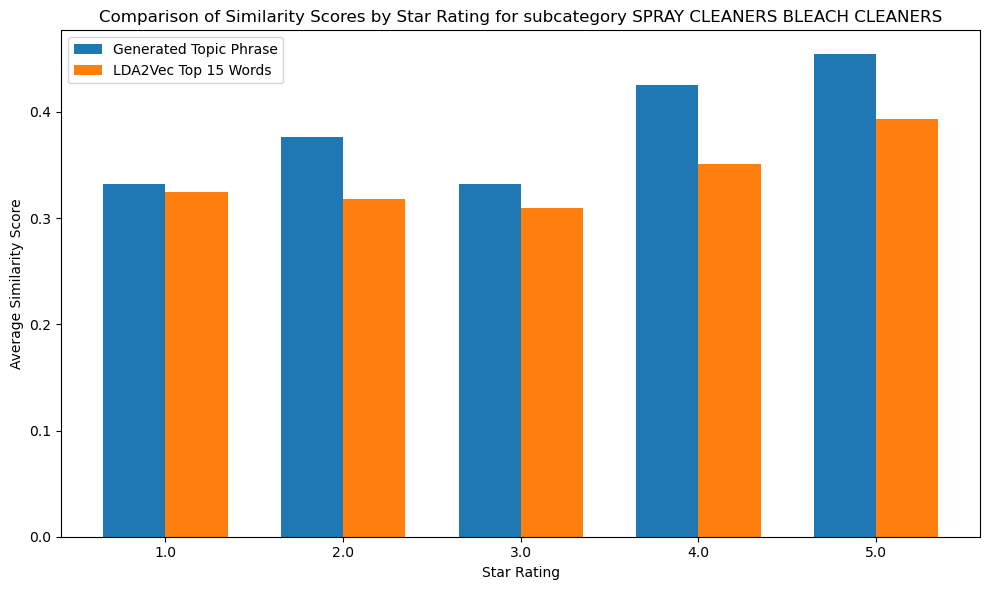

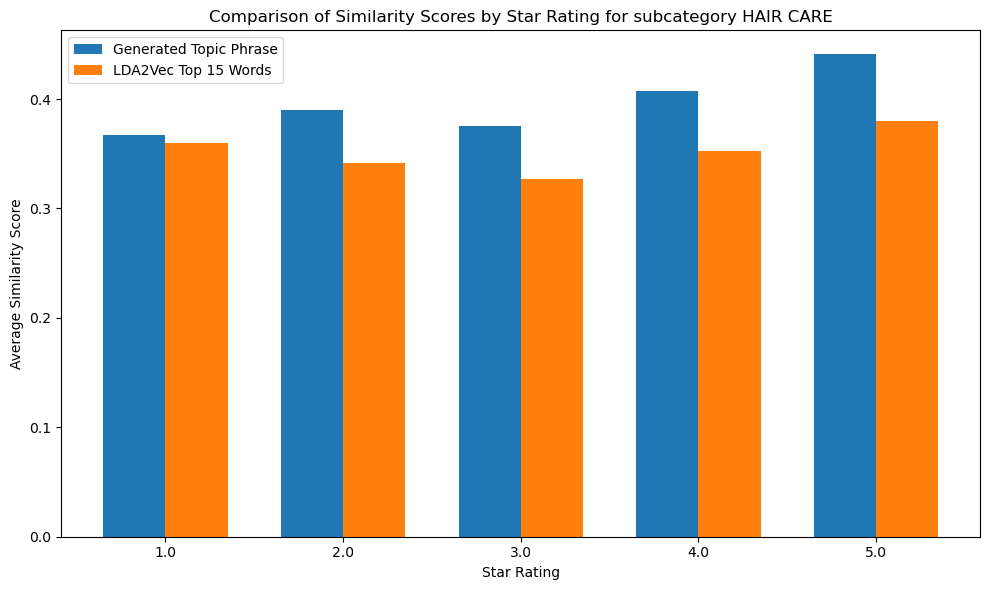

In [43]:
for subcategory in subcategories:    
    sub_df = result_df[result_df['subcategory']==subcategory] # Calculate the average similarity scores by star rating
    avg_scores = sub_df.groupby('star_rating')[['lda2vec_similarity_score', 'lda2vec_words_similarity_score']].mean()

    # Plotting the side-by-side bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the width of each bar
    bar_width = 0.35
    star_ratings = avg_scores.index
    x = range(len(star_ratings))

    # Plot each similarity score as bars side by side
    ax.bar(x, avg_scores['lda2vec_similarity_score'], width=bar_width, label='Generated Topic Phrase')
    ax.bar([i + bar_width for i in x], avg_scores['lda2vec_words_similarity_score'], width=bar_width, label='LDA2Vec Top 15 Words')

    # Set the x-axis labels and chart labels
    ax.set_xlabel('Star Rating')
    ax.set_ylabel('Average Similarity Score')
    ax.set_title(f'Comparison of Similarity Scores by Star Rating for subcategory {subcategory}')
    ax.set_xticks([i + bar_width / 2 for i in x])
    ax.set_xticklabels(star_ratings)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [44]:
for subcategory in subcategories:
    topic_similarity_df = lda2vec_model.get_topic_information(subcategory)

In [45]:
topic_similarity_df

,star_rating,lda2vec_topic_label,lda2vec_similarity_score,count
0,1.0,"""Bad hair, shampoo, and conditioner using and ...",0.389532,107
1,1.0,"""Not impressed with hair product after purchase""",0.345624,113
2,2.0,"""Hair condition and smell not as expected""",0.369909,50
3,2.0,Hair care products have irritating side effects.,0.417060,36
4,3.0,"""Good hair care with pleasant scent and decent...",0.324408,49
5,3.0,"""Shampoo and conditioner product works well, s...",0.415153,62
6,4.0,"""Effective shampoo and conditioner combo with ...",0.460909,64
7,4.0,"""Good hair care, nice smell, works well, great...",0.368846,88
8,5.0,"""Great shampoo and conditioner for soft hair a...",0.440736,1009


In [46]:
for subcategory in subcategories:
    print(f"Subcategory: {subcategory}")
    print(result_df[result_df['subcategory']==subcategory]['lda2vec_topic_words'].unique())

Subcategory: WIPES DISINFECTING WIPES
['wipe, container, leak, package, dry, like, good, smell, order, box, time, open, lid, buy, seal'
 'wipe, clean, use, love, smell, disinfect, scent, easy, surface, product, house, like, kitchen, bathroom, cleaning'
 'wipe, good, clean, use, smell, product, brand, love, price, like, work, buy, scent, job, pack'
 'wipe, use, clean, dry, smell, like, good, product, wet, leave, container, scent, buy, surface, time'
 'wipe, container, product, buy, leak, dry, seal, open, use, wet, like, liquid, pull, box, smell'
 'wipe, use, product, clean, like, good, order, lid, come, container, scent, need, time, work, cleaning'
 'wipe, clean, use, smell, good, like, scent, love, product, disinfect, work, easy, surface, cleaning, job'
 'wipe, use, container, smell, product, scent, buy, tear, like, towel, clean, paper, dry, good, sheet'
 'wipe, good, like, scent, use, price, product, small, work, smell, clean, container, pack, disinfect, job'
 'order, wipe, receive, i

In [47]:
df['product_title'].unique()

array(['Clorox Wring Clean Cotton Mop',
       '32 oz. Rapid Clean Remediation, Trigger Spray Bottle',
       'Mrs Meyers Clean Day Cleaner Plastic Bottle Multi Surface Rp 16 Oz',
       ...,
       'Yes To Grapefruit Ao Subsegment Single Use Ao Treatment Ao Scent 1 Ct .33 Oz - 0811748031311',
       'Reviva Labs Firming Eye Serum -- 1 fl oz',
       'Clean & Clear Daily Pore Face Cleanser for Acne-Prone Skin - 5.5 oz'],
      dtype=object)

In [48]:
df['brand'].unique()

array(['Clorox', 'Rapid', "Mrs. Meyer's Clean Day", 'Pourri',
       'Twist & Shout', 'Granite Gold', 'Crocodile Cloth',
       'Green Gobbler', 'Swiffer', 'Febreze', 'Rid-X', 'CVS Total Home',
       'Pledge', 'Soft Scrub', 'Air Wick', 'Method', 'Bissell',
       'BabyGanics', 'Zep', 'Mr. Clean', 'Lysol', 'Pine-Sol',
       'Scrubbing Bubbles', 'Smartly', 'Murphy Oil Soap', 'Fabuloso',
       "Member's Mark", 'Scotch-Brite', 'Bona', 'Amazon Basics',
       'Sprayway', 'Lestoil', 'Glisten', 'Windex', 'Pinalen', 'Up & Up',
       'Oxiclean', 'Wet & Forget', 'Drano', 'Easy-Off', 'Pure Citrus',
       'CLR', 'Shark', 'Glade', 'Odoban', 'NB Pure', 'Breeze Deodorant',
       'Funkaway', 'Weiman', 'Scrub Daddy', 'Simple Green', 'FamilyGuard',
       'S.O.S.', 'Health Plus', 'The Pink Stuff', 'LifeStraw',
       'Great Value', 'Ty-D-Bol', 'Liquid-Plumr', 'Greased Lightning',
       'DampRid', 'Mer-Maid', 'Sani Sticks', 'Orange Glo', 'Resolve',
       'Bar Keepers Friend', 'Brillo', 'Pine Glo'

In [49]:
df_filtered = df.dropna(subset=['lda2vec_topic_label'])

In [50]:
df_filtered.columns

Index(['brand', 'product_title', 'proxy_date', 'retailer', 'category',
       'subcategory', 'review_text', 'star_rating', 'topic', 'brand_type',
       'lda2vec_topic_id', 'lda2vec_topic_label', 'lda2vec_topic_words',
       'lda2vec_words_similarity_score', 'lda2vec_similarity_score'],
      dtype='object')

In [51]:
df_filtered.groupby('subcategory').agg({'lda2vec_similarity_score': 'mean'})


,lda2vec_similarity_score
subcategory,
AIR FRESHENER,0.405258
BODY CARE BODY LOTION,0.447412
HAIR CARE,0.419860
SPRAY CLEANERS BLEACH CLEANERS,0.438708
WIPES DISINFECTING WIPES,0.378486


In [53]:
df_filtered.to_csv('../outputs/lda2vec_five_topics.csv')